In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 데이터 로드
df = pd.read_csv('data/cars.csv', index_col = 'Unnamed: 0')

In [3]:
X_data = df.iloc[:,0].values
y_data = df.iloc[:,1].values

In [5]:
### Dense 클래스
#1. w,b 랜덤으로 초기화
#2. forward 연산 : hx = w*x + b

# input_dim : 특성 데이터 갯수, units : 라벨의 갯수

dense = Dense(units = 1, input_dim = 1) # w : 1개 랜덤 초기화, b : 1개 초기화

dense(X_data.reshape(-1,1)) # hx = w*x_data + b

w,b = dense.get_weights()

In [7]:
w, b

(array([[-0.21621895]], dtype=float32), array([0.], dtype=float32))

In [8]:
dense = Dense(units = 1, input_dim = 1)
model = Sequential( [dense] ) # 추정할 값을 지정
model.compile(loss = 'mse', optimizer = Adam(0.1)) # 
model.fit(X_data, y_data, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 5129.9023
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 4684.9561
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 4249.8027
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 3813.6250
Epoch 5/500
2/2 [==============================] - 0s 15ms/step - loss: 3471.4644
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 3082.0745
Epoch 7/500
2/2 [==============================] - 0s 0s/step - loss: 2762.9846
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 2449.0610
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 2171.2075
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 1908.2109
Epoch 11/500
2/2 [==============================] - 0s 0s/step - loss: 1686.4215
Epoch 12/500
2/2 [==============================] - 0s 2ms/step - loss: 1460.5825
Epoch 13/500
2/2 [=========

In [10]:
w,b = dense.get_weights()
w, b

(array([[3.4111578]], dtype=float32), array([-8.687869], dtype=float32))

In [16]:
pred = dense(X_data.reshape(-1,1))

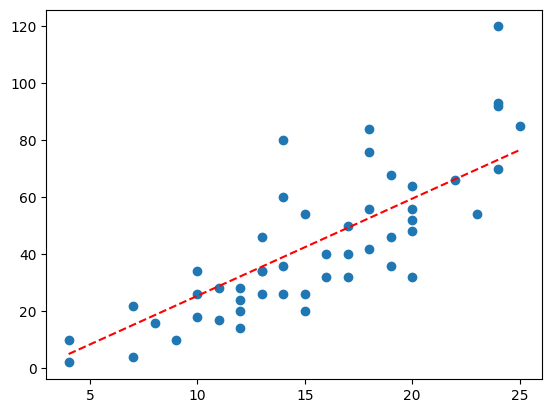

In [17]:
plt.scatter(X_data, y_data)t
plt.plot(X_data, pred, 'r--')
plt.show()

In [28]:
myx = np.array([1,2,3,4,5], np.float32)
myy = np.array([3,5,7,9,11], np.float32)

In [29]:
class MyDense:
    def __init__(self):
        self.w = tf.random.uniform([1])
        self.b = 0.
    def __call__(self, xdata):
        print('call', xdata)
        hx = self.w*xdata + self.b
        return hx
    def get_weights(self):
        return self.w, self.b

In [30]:
my = MyDense()
my( myx )

call [1. 2. 3. 4. 5.]


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.09481764, 0.18963528, 0.28445292, 0.37927055, 0.4740882 ],
      dtype=float32)>

In [51]:
df = pd.read_csv('data/electric.csv', index_col = 'Unnamed: 0')
df.head()

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98


In [69]:
X_data = df.iloc[:,0].values
y_data = df.iloc[:,1].values

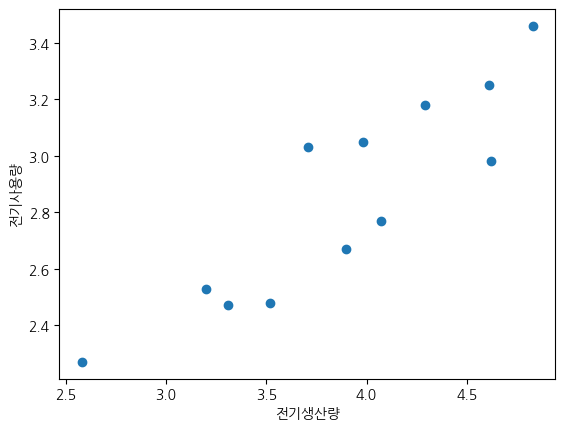

In [70]:
# 시각화
plt.rc('font',family = 'NanumGothic')

plt.scatter(X_data, y_data)

plt.xlabel('전기생산량')
plt.ylabel('전기사용량')

plt.show()

In [71]:
x = tf.constant(X_data, tf.float32)
y = tf.constant(y_data, tf.float32)
w = tf.Variable(tf.random.uniform([1]))
b = tf.Variable(tf.random.uniform([1]))

def compute_cost():
    hx = w*x+b
    c = tf.reduce_mean((hx-y)**2)
    return c

In [72]:
optimizer = Adam(learning_rate = 0.01)
hist_cost = []
for i in range(2000):
    optimizer.minimize(compute_cost, var_list = [w,b])
    c = compute_cost().numpy()
    hist_cost.append(c)
    print(i, 'cost=', c)

0 cost= 2.684955
1 cost= 2.526848
2 cost= 2.3738134
3 cost= 2.225926
4 cost= 2.0832498
5 cost= 1.9458399
6 cost= 1.8137417
7 cost= 1.6869894
8 cost= 1.5656058
9 cost= 1.449602
10 cost= 1.3389769
11 cost= 1.233717
12 cost= 1.1337951
13 cost= 1.0391716
14 cost= 0.9497939
15 cost= 0.86559516
16 cost= 0.78649616
17 cost= 0.71240443
18 cost= 0.64321446
19 cost= 0.57880867
20 cost= 0.51905745
21 cost= 0.46381986
22 cost= 0.41294456
23 cost= 0.3662703
24 cost= 0.3236271
25 cost= 0.28483668
26 cost= 0.24971478
27 cost= 0.21807103
28 cost= 0.18971074
29 cost= 0.16443615
30 cost= 0.14204772
31 cost= 0.12234541
32 cost= 0.10512995
33 cost= 0.09020406
34 cost= 0.07737407
35 cost= 0.066450424
36 cost= 0.057249475
37 cost= 0.049594183
38 cost= 0.043314993
39 cost= 0.03825084
40 cost= 0.034249563
41 cost= 0.031168679
42 cost= 0.028875763
43 cost= 0.027248649
44 cost= 0.02617558
45 cost= 0.02555537
46 cost= 0.02529709
47 cost= 0.025320038
48 cost= 0.025553295
49 cost= 0.025935419
50 cost= 0.026413819


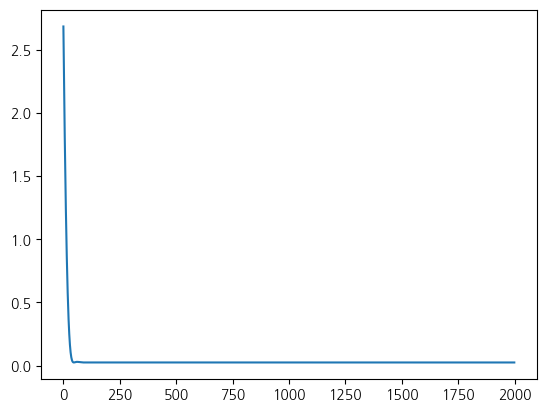

In [73]:
plt.plot(hist_cost)
plt.show()

In [74]:
def hxFn(xdata):
    hx = w*xdata+b
    return hx.numpy()

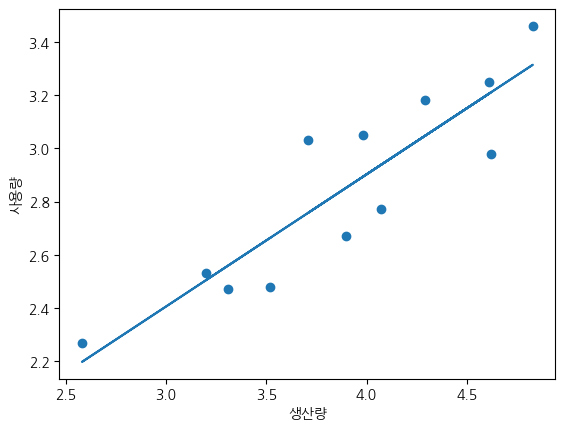

In [75]:
# 시각화
plt.scatter(x, y)
plt.plot(x, hxFn(x))
plt.xlabel('생산량')
plt.ylabel('사용량')

plt.show()

In [76]:
# 정답
hxFn(3.5), hxFn(4), hxFn(3)

(array([2.6537783], dtype=float32),
 array([2.9020233], dtype=float32),
 array([2.4055333], dtype=float32))

In [78]:
from sklearn.metrics import r2_score

r2_score(y, hxFn(x))

0.7973097675016063

In [ ]:
#### high

In [81]:
X_data = df.iloc[:,0].values
y_data = df.iloc[:,1].values

In [82]:
dense = Dense(units = 1, input_dim = 1)
model = Sequential( [dense] ) # 추정할 값을 지정
model.compile(loss = 'mse', optimizer = Adam(0.1)) # 
model.fit(X_data, y_data, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 332ms/step - loss: 1.6959
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6790
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1591
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0733
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2496
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4515
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5287
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4695
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3331
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.1894
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0904
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0598
Epoch 13/500
1/1 [==============================] - 0s 2m

In [83]:
w,b = dense.get_weights()
w, b

(array([[0.49564362]], dtype=float32), array([0.9194211], dtype=float32))

In [84]:
pred = dense(X_data.reshape(-1,1))

In [85]:
pred

<tf.Tensor: shape=(12, 1), dtype=float32, numpy=
array([[2.6640866],
       [2.1981816],
       [2.5600014],
       [2.9366908],
       [3.2092943],
       [2.8920827],
       [3.045732 ],
       [3.3133798],
       [2.7582588],
       [3.204338 ],
       [2.8524313],
       [2.5054808]], dtype=float32)>

In [86]:
X_data

array([3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.9 ,
       3.2 ])

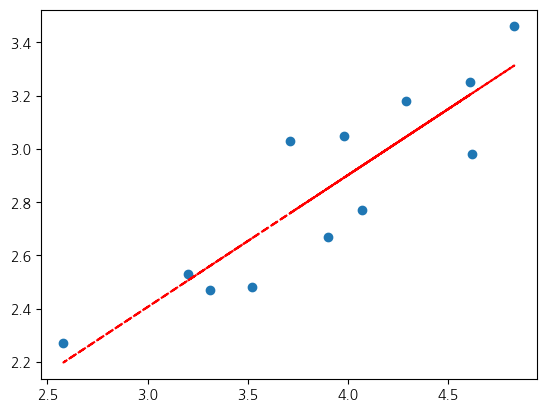

In [87]:
plt.scatter(X_data, y_data)
plt.plot(X_data, pred, 'r--')
plt.show()

In [88]:
model.predict([3.5, 4, 3])

1/1 [==============================] - 0s 64ms/step


array([[2.6541739],
       [2.9019957],
       [2.406352 ]], dtype=float32)

In [89]:
r2_score(y, pred)

0.7973124038718824